# 📊 Первичная аналитика: task_1_candles.csv

Этот ноутбук содержит первичную аналитику данных о свечах (OHLCV) для быстрого онбординга.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


## 1. Загрузка данных


In [2]:
# Загрузка данных
df = pd.read_csv('../data/raw/task_1_candles.csv')

# Конвертация даты
df['begin'] = pd.to_datetime(df['begin'])

# Сортировка
df = df.sort_values(['ticker', 'begin']).reset_index(drop=True)

print(f"Размер датасета: {df.shape}")
print(f"Период: {df['begin'].min()} - {df['begin'].max()}")
df.head(10)


Размер датасета: (25188, 7)
Период: 2020-06-19 00:00:00 - 2025-06-18 00:00:00


,open,close,high,low,volume,begin,ticker
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT
5,79.00,82.90,83.00,77.44,37790740,2020-06-29,AFLT
6,82.82,82.34,83.62,80.98,23644570,2020-06-30,AFLT
7,82.36,81.62,84.22,81.40,18886540,2020-07-02,AFLT
8,80.90,80.98,81.38,79.56,19891100,2020-07-03,AFLT
9,81.36,81.24,82.64,80.50,18364020,2020-07-06,AFLT


## 2. Общая информация о данных


In [3]:
# Информация о типах данных
print("=== Типы данных ===")
print(df.dtypes)
print("\n=== Пропущенные значения ===")
print(df.isnull().sum())
print("\n=== Базовая статистика ===")
df.describe()


=== Типы данных ===
open             float64
close            float64
high             float64
low              float64
volume             int64
begin     datetime64[ns]
ticker            object
dtype: object

=== Пропущенные значения ===
open      0
close     0
high      0
low       0
volume    0
begin     0
ticker    0
dtype: int64

=== Базовая статистика ===


,open,close,high,low,volume,begin
count,25188.000000,25188.000000,25188.000000,25188.000000,2.518800e+04,25188
mean,1484.926037,1484.017563,1505.030684,1461.410738,3.248030e+09,2022-12-31 06:40:32.015245056
min,21.900000,22.440000,23.280000,21.440000,1.829000e+03,2020-06-19 00:00:00
25%,122.000000,121.907500,123.737500,119.650000,5.026592e+05,2021-09-15 00:00:00
50%,328.075000,327.945000,330.450000,325.025000,2.576044e+06,2023-01-10 00:00:00
75%,1725.000000,1725.050000,1749.850000,1699.250000,1.681908e+07,2024-04-08 00:00:00
max,9000.000000,8908.000000,10097.000000,8500.000000,7.032681e+11,2025-06-18 00:00:00
std,2114.967076,2113.615600,2142.065096,2083.388808,2.313985e+10,NaN


## 3. Анализ тикеров


In [4]:
# Список тикеров
tickers = df['ticker'].unique()
print(f"Количество уникальных тикеров: {len(tickers)}")
print(f"\nТикеры: {sorted(tickers)}")


Количество уникальных тикеров: 20

Тикеры: ['AFLT', 'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT', 'MOEX', 'MTSS', 'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER', 'SIBN', 'T', 'VTBR', 'YNDX']


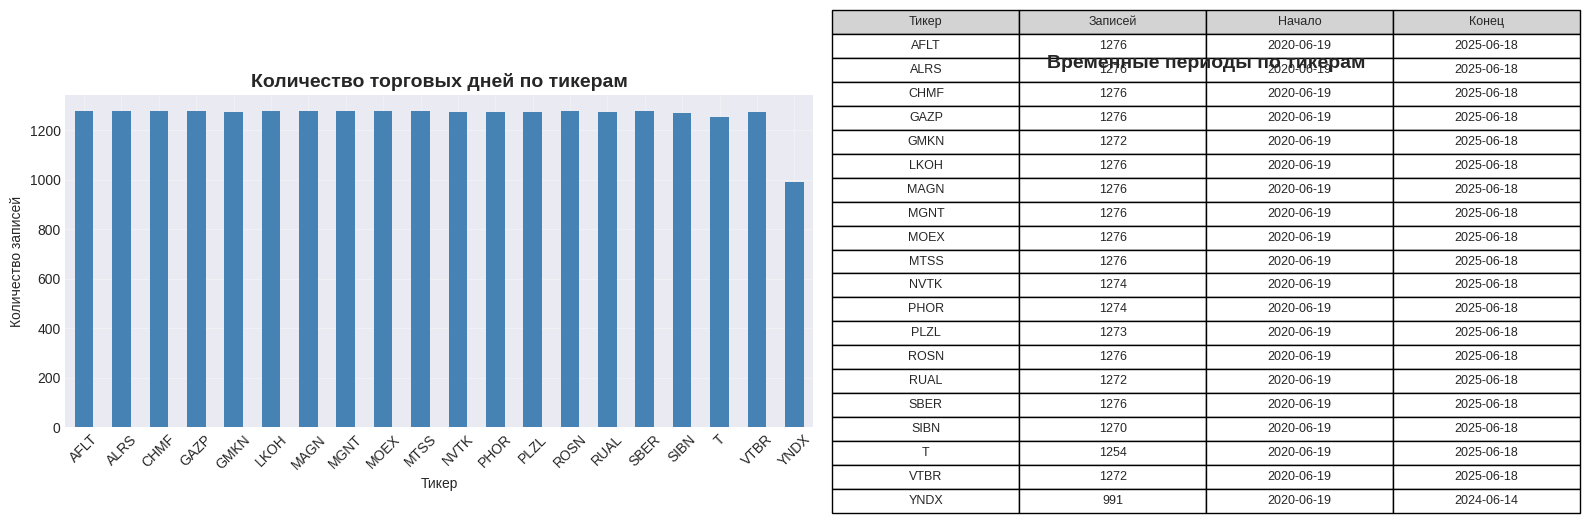


Статистика по тикерам:
count      20.000000
mean     1259.400000
std        63.369759
min       991.000000
25%      1272.000000
50%      1276.000000
75%      1276.000000
max      1276.000000
Name: count, dtype: float64


In [5]:
# Количество записей по каждому тикеру
ticker_counts = df['ticker'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Барплот
ticker_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Количество торговых дней по тикерам', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Тикер')
axes[0].set_ylabel('Количество записей')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Таблица со статистикой
axes[1].axis('off')
table_data = []
for ticker in sorted(tickers):
    ticker_df = df[df['ticker'] == ticker]
    table_data.append([
        ticker,
        len(ticker_df),
        ticker_df['begin'].min().strftime('%Y-%m-%d'),
        ticker_df['begin'].max().strftime('%Y-%m-%d')
    ])

table = axes[1].table(cellText=table_data,
                      colLabels=['Тикер', 'Записей', 'Начало', 'Конец'],
                      cellLoc='center', loc='center',
                      colColours=['lightgray']*4)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
axes[1].set_title('Временные периоды по тикерам', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nСтатистика по тикерам:")
print(ticker_counts.describe())


## 4. Временной анализ


Общий период данных: 2020-06-19 - 2025-06-18
Длительность: 1825 дней


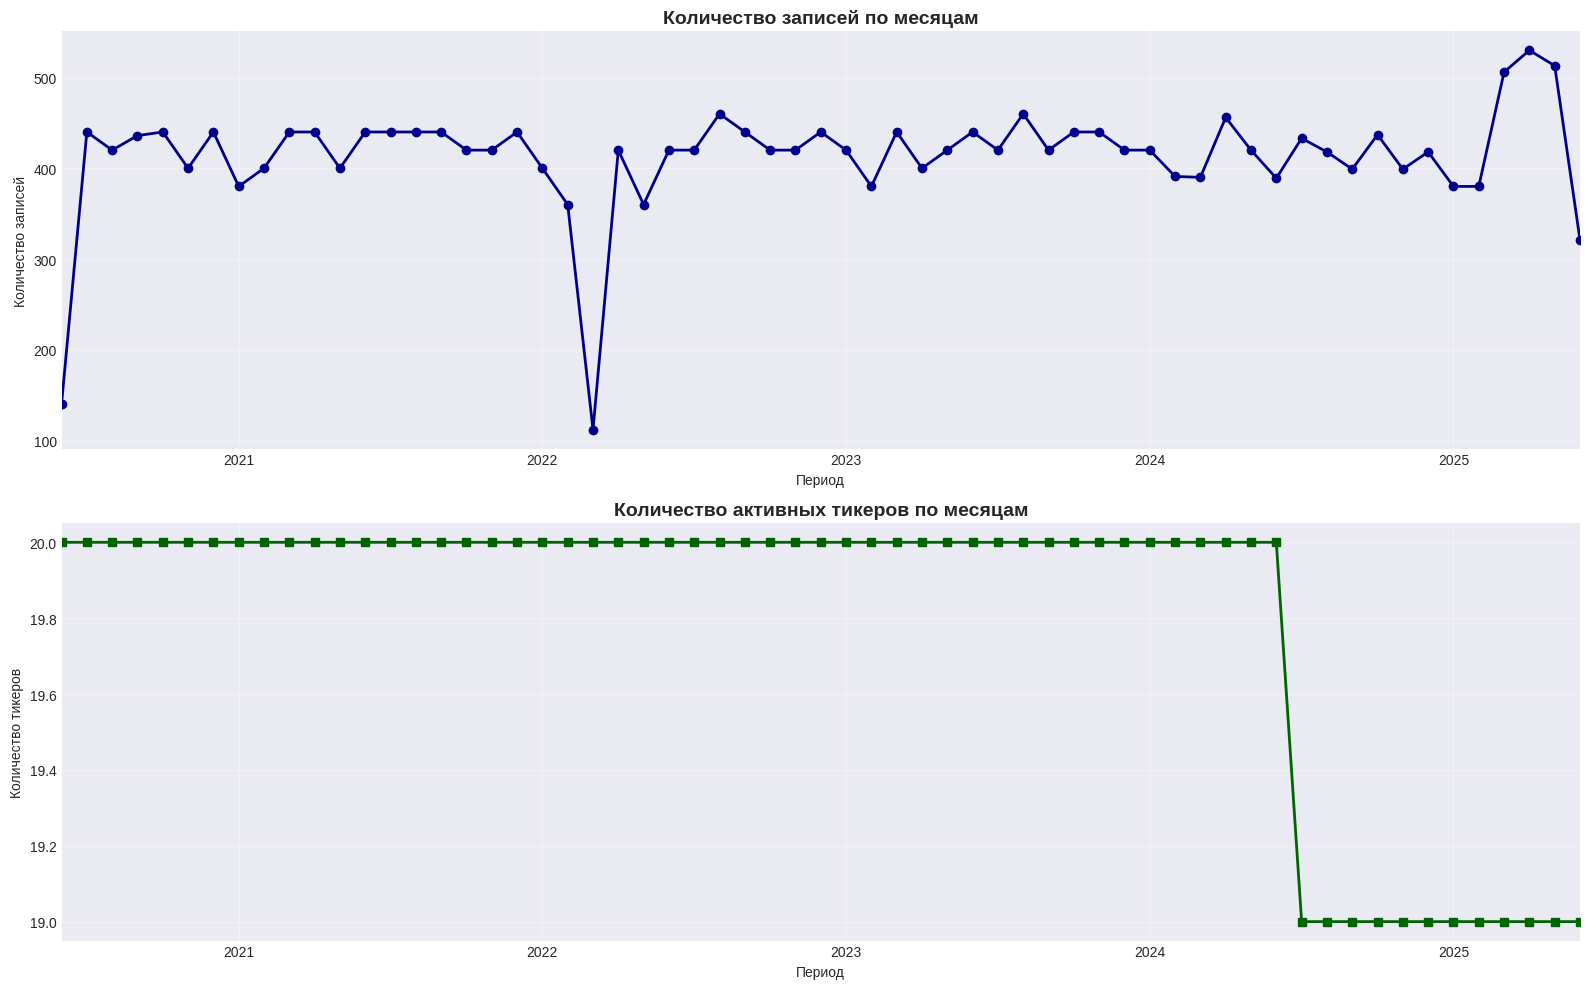

In [6]:
# Анализ временных периодов
print(f"Общий период данных: {df['begin'].min().date()} - {df['begin'].max().date()}")
print(f"Длительность: {(df['begin'].max() - df['begin'].min()).days} дней")

# Количество записей по времени
df['year'] = df['begin'].dt.year
df['month'] = df['begin'].dt.month
df['year_month'] = df['begin'].dt.to_period('M')

# Графики временных рядов
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Количество записей по месяцам
monthly_counts = df.groupby('year_month').size()
monthly_counts.plot(ax=axes[0], marker='o', linewidth=2, color='darkblue')
axes[0].set_title('Количество записей по месяцам', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Период')
axes[0].set_ylabel('Количество записей')
axes[0].grid(True, alpha=0.3)

# Количество уникальных тикеров по месяцам
monthly_tickers = df.groupby('year_month')['ticker'].nunique()
monthly_tickers.plot(ax=axes[1], marker='s', linewidth=2, color='darkgreen')
axes[1].set_title('Количество активных тикеров по месяцам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Период')
axes[1].set_ylabel('Количество тикеров')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Анализ цен


=== Статистика по ценам ===
               open         close          high           low
count  25188.000000  25188.000000  25188.000000  25188.000000
mean    1484.926037   1484.017563   1505.030684   1461.410738
std     2114.967076   2113.615600   2142.065096   2083.388808
min       21.900000     22.440000     23.280000     21.440000
25%      122.000000    121.907500    123.737500    119.650000
50%      328.075000    327.945000    330.450000    325.025000
75%     1725.000000   1725.050000   1749.850000   1699.250000
max     9000.000000   8908.000000  10097.000000   8500.000000


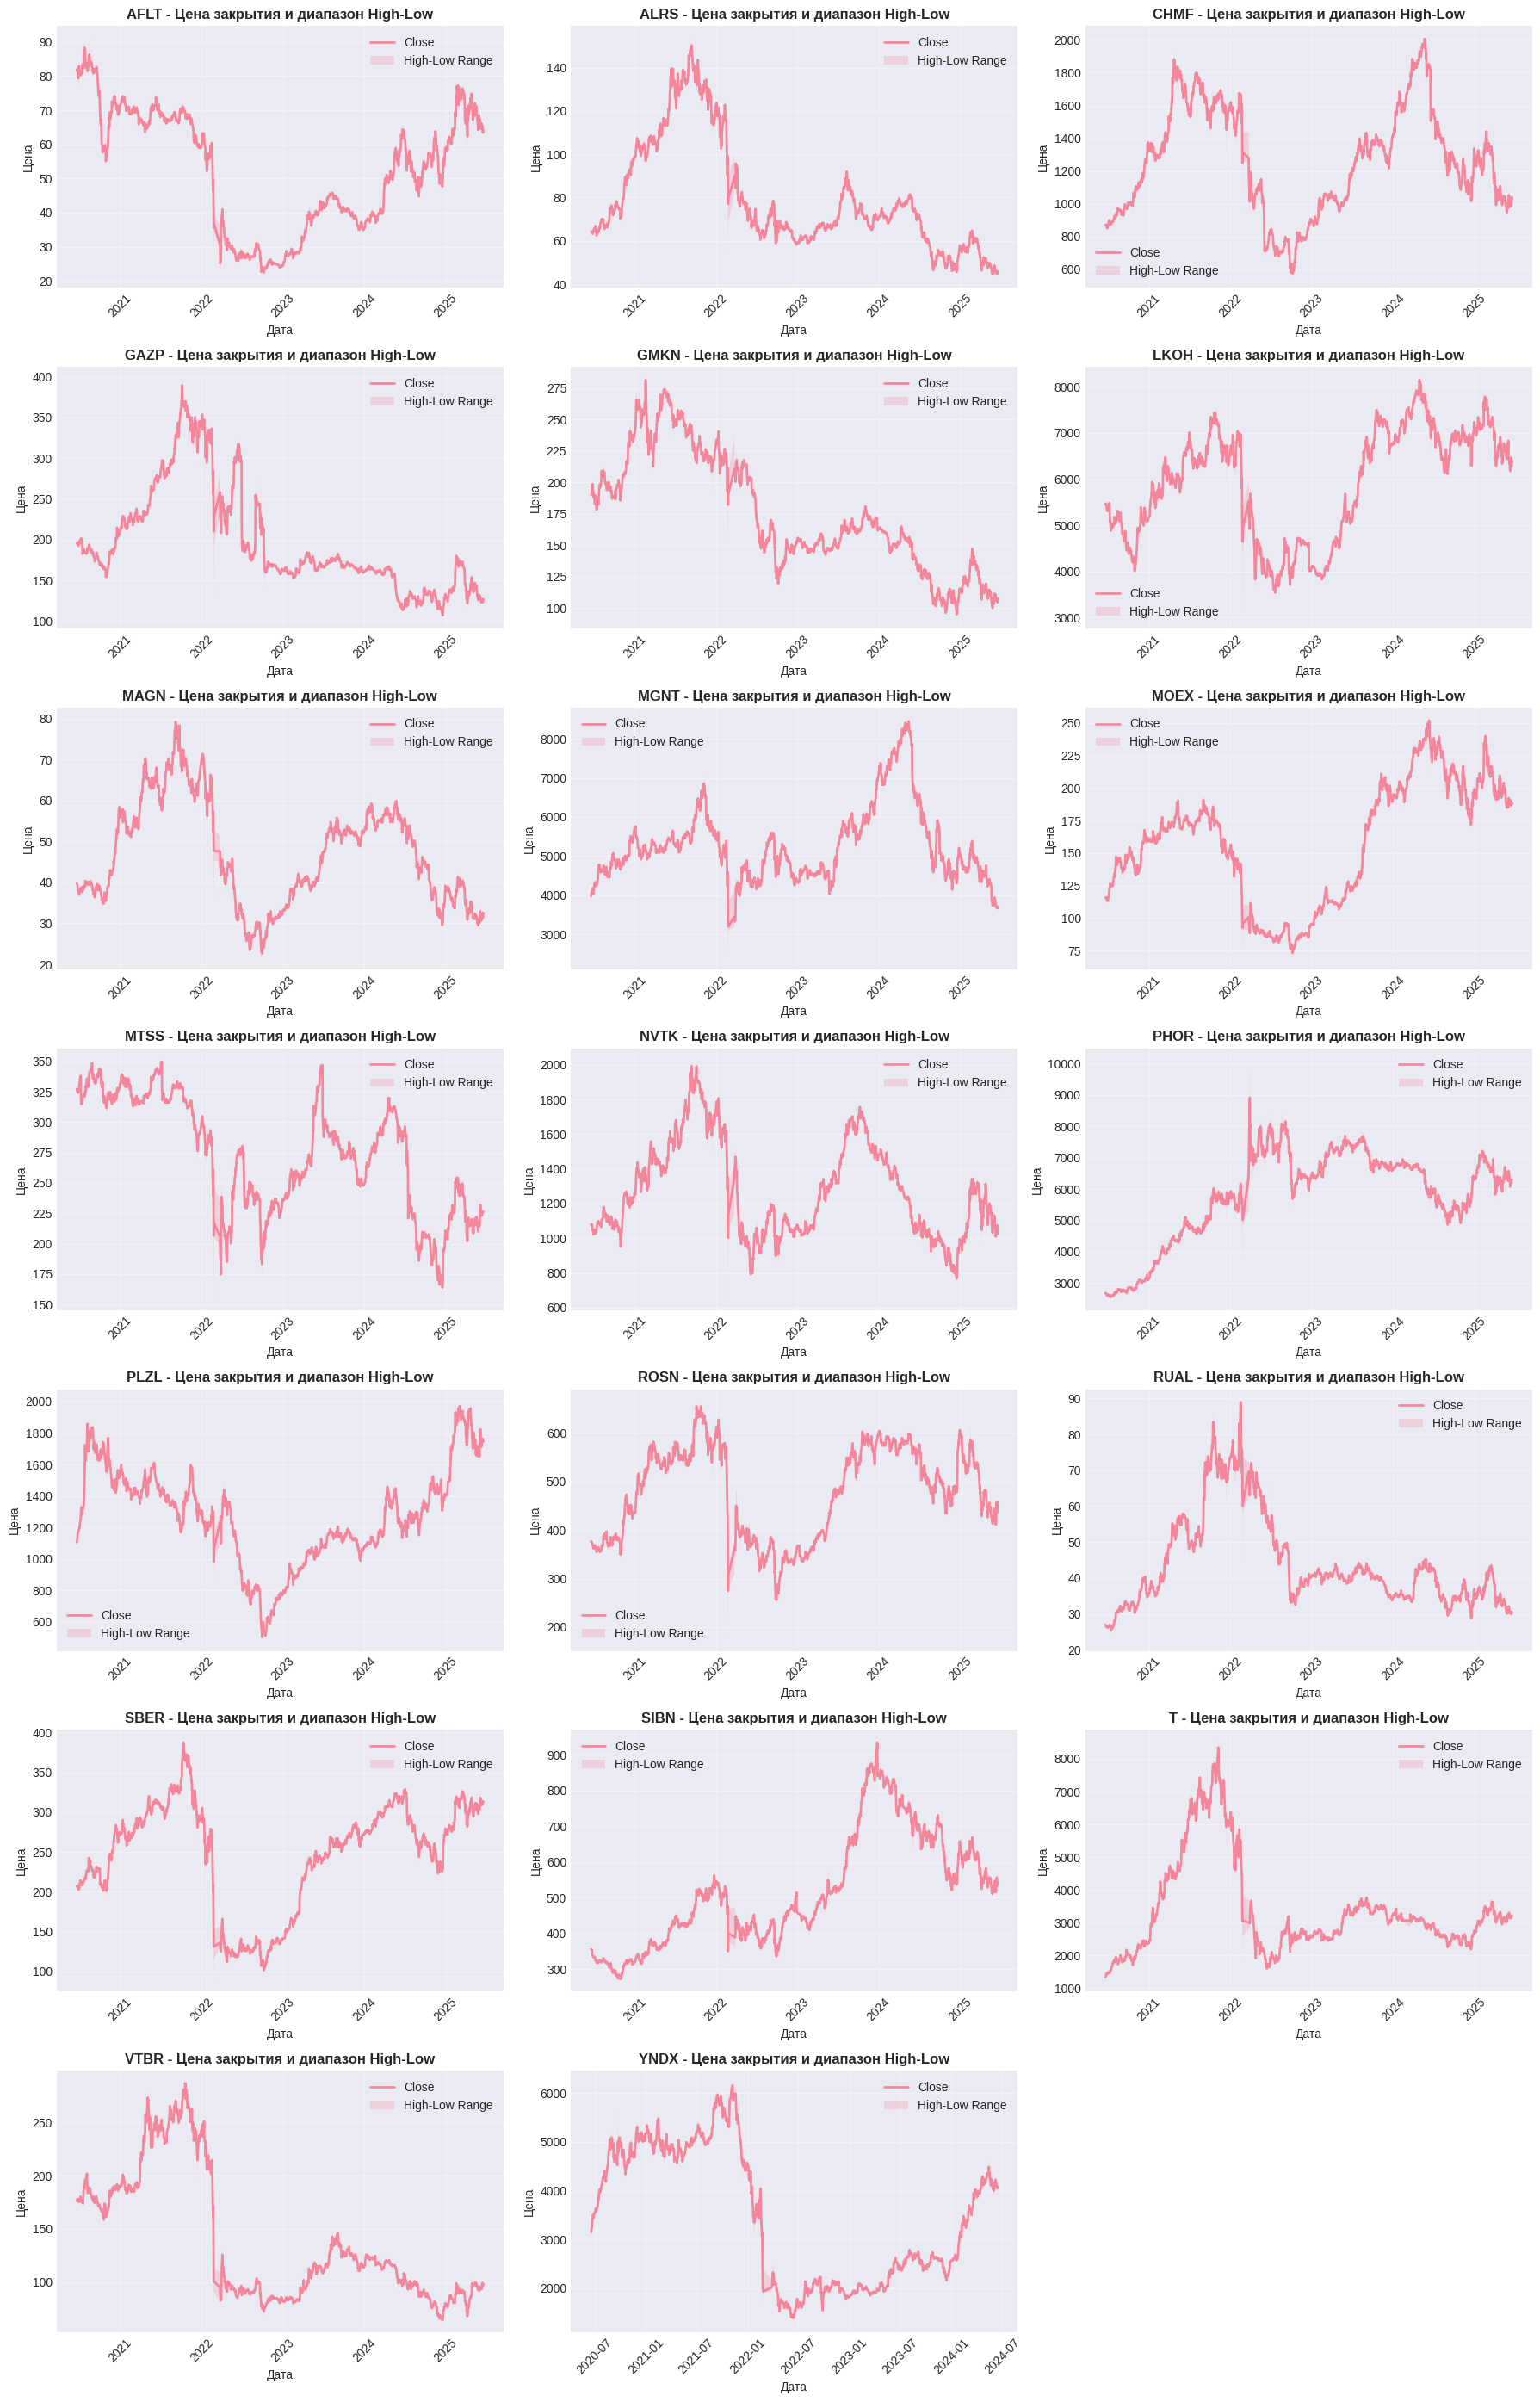

In [7]:
# Статистика по ценам
print("=== Статистика по ценам ===")
print(df[['open', 'close', 'high', 'low']].describe())

# Графики цен для каждого тикера
n_tickers = len(tickers)
n_cols = 3
n_rows = (n_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten() if n_tickers > 1 else [axes]

for idx, ticker in enumerate(sorted(tickers)):
    ticker_df = df[df['ticker'] == ticker].sort_values('begin')
    ax = axes[idx]

    ax.plot(ticker_df['begin'], ticker_df['close'], label='Close', linewidth=2, alpha=0.8)
    ax.fill_between(ticker_df['begin'], ticker_df['low'], ticker_df['high'],
                     alpha=0.2, label='High-Low Range')

    ax.set_title(f'{ticker} - Цена закрытия и диапазон High-Low', fontweight='bold')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Скрыть лишние subplot'ы
for idx in range(n_tickers, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## 6. Анализ доходности


In [8]:
# Расчет дневной доходности
df['daily_return'] = df.groupby('ticker')['close'].pct_change()
df['intraday_return'] = (df['close'] - df['open']) / df['open']

print("=== Статистика доходности ===")
print(df[['daily_return', 'intraday_return']].describe())


=== Статистика доходности ===
       daily_return  intraday_return
count  25168.000000     25188.000000
mean       0.000333        -0.000419
std        0.022988         0.021660
min       -0.412538        -0.341200
25%       -0.009735        -0.010366
50%        0.000000        -0.000900
75%        0.010197         0.009175
max        0.333715         0.315270


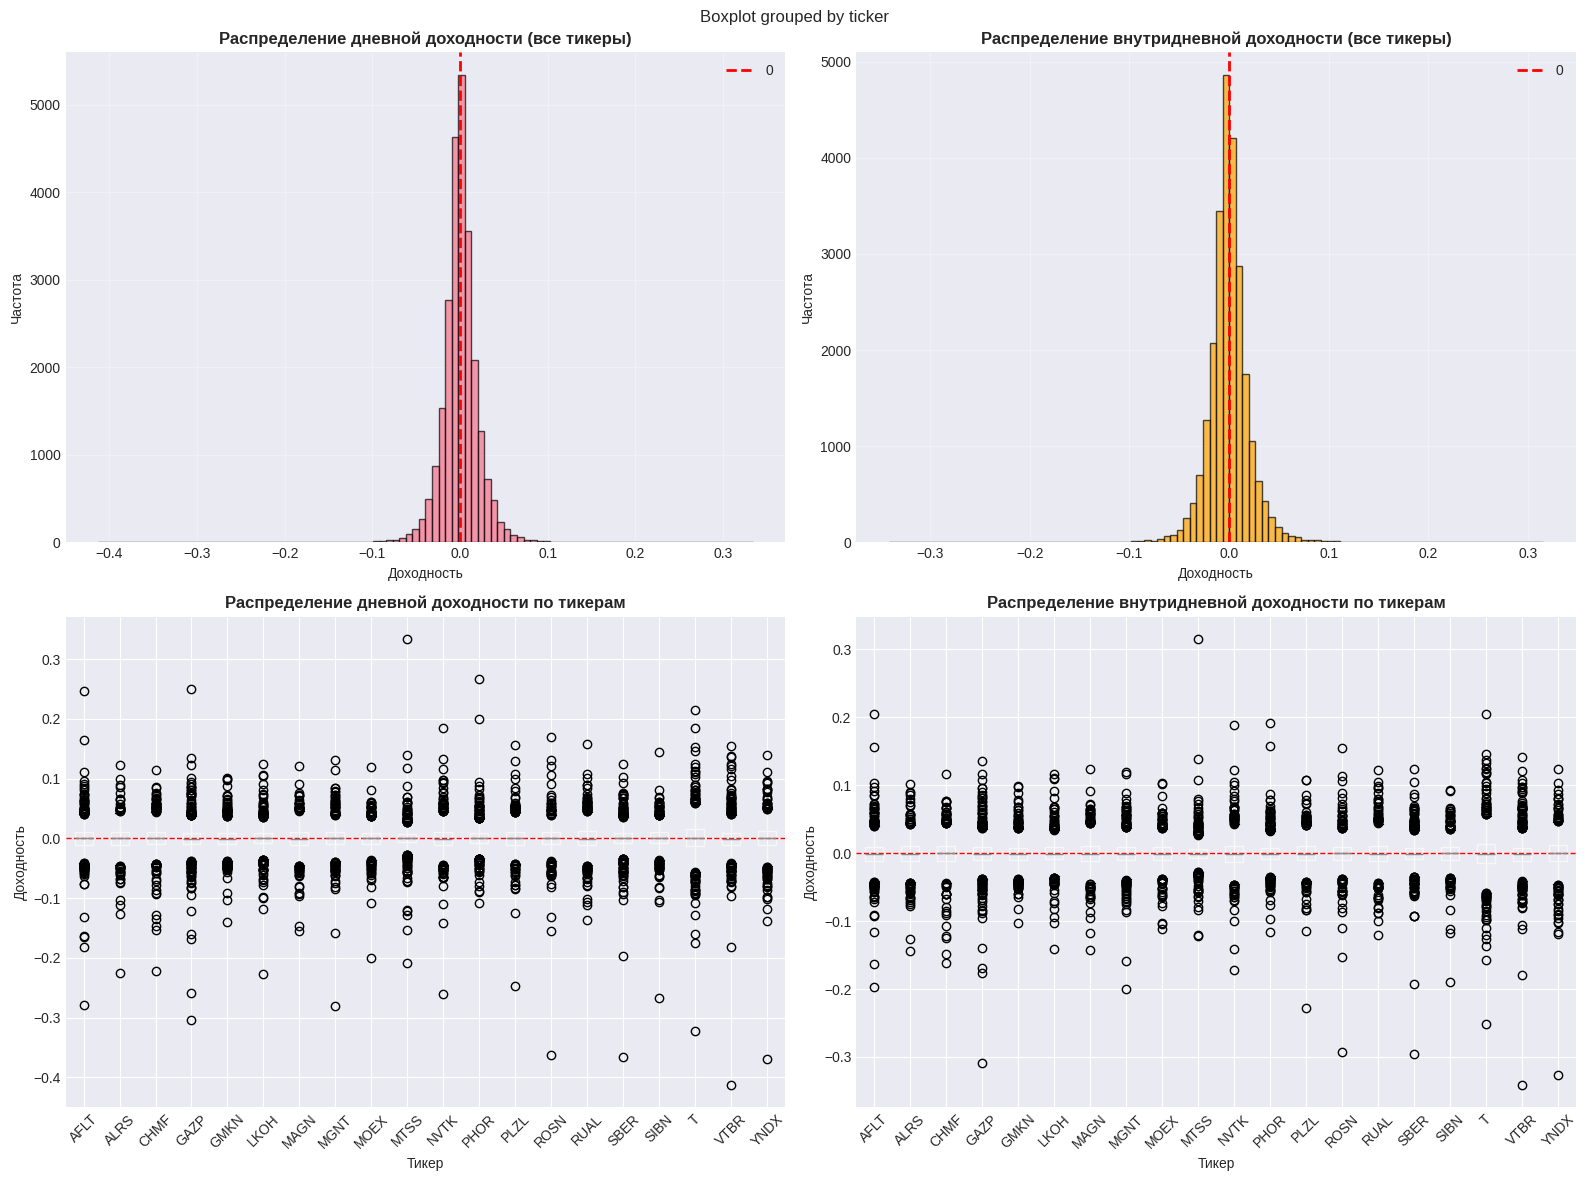

In [9]:
# Распределение доходностей
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Дневная доходность - гистограмма
df['daily_return'].dropna().hist(bins=100, ax=axes[0, 0], edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение дневной доходности (все тикеры)', fontweight='bold')
axes[0, 0].set_xlabel('Доходность')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='0')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Внутридневная доходность - гистограмма
df['intraday_return'].dropna().hist(bins=100, ax=axes[0, 1], edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Распределение внутридневной доходности (все тикеры)', fontweight='bold')
axes[0, 1].set_xlabel('Доходность')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='0')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Boxplot по тикерам - дневная доходность
df.boxplot(column='daily_return', by='ticker', ax=axes[1, 0])
axes[1, 0].set_title('Распределение дневной доходности по тикерам', fontweight='bold')
axes[1, 0].set_xlabel('Тикер')
axes[1, 0].set_ylabel('Доходность')
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Boxplot по тикерам - внутридневная доходность
df.boxplot(column='intraday_return', by='ticker', ax=axes[1, 1])
axes[1, 1].set_title('Распределение внутридневной доходности по тикерам', fontweight='bold')
axes[1, 1].set_xlabel('Тикер')
axes[1, 1].set_ylabel('Доходность')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



=== Статистика дневной доходности по тикерам ===
        Средняя  Ст. откл.  Минимум  Максимум  Медиана
ticker                                                
AFLT     0.0001     0.0251  -0.2791    0.2472   0.0000
ALRS    -0.0000     0.0217  -0.2245    0.1230   0.0000
CHMF     0.0004     0.0230  -0.2211    0.1144   0.0004
GAZP    -0.0000     0.0257  -0.3046    0.2495  -0.0005
GMKN    -0.0003     0.0195  -0.1395    0.1017  -0.0006
LKOH     0.0003     0.0199  -0.2276    0.1241  -0.0001
MAGN     0.0001     0.0218  -0.1549    0.1219  -0.0006
MGNT     0.0002     0.0218  -0.2800    0.1320   0.0001
MOEX     0.0006     0.0188  -0.2008    0.1201  -0.0001
MTSS    -0.0001     0.0206  -0.2078    0.3337   0.0000
NVTK     0.0003     0.0240  -0.2604    0.1848  -0.0008
PHOR     0.0009     0.0200  -0.1075    0.2662   0.0000
PLZL     0.0006     0.0224  -0.2462    0.1568   0.0000
ROSN     0.0004     0.0225  -0.3631    0.1697   0.0006
RUAL     0.0004     0.0232  -0.1366    0.1581  -0.0006
SBER     0.0006

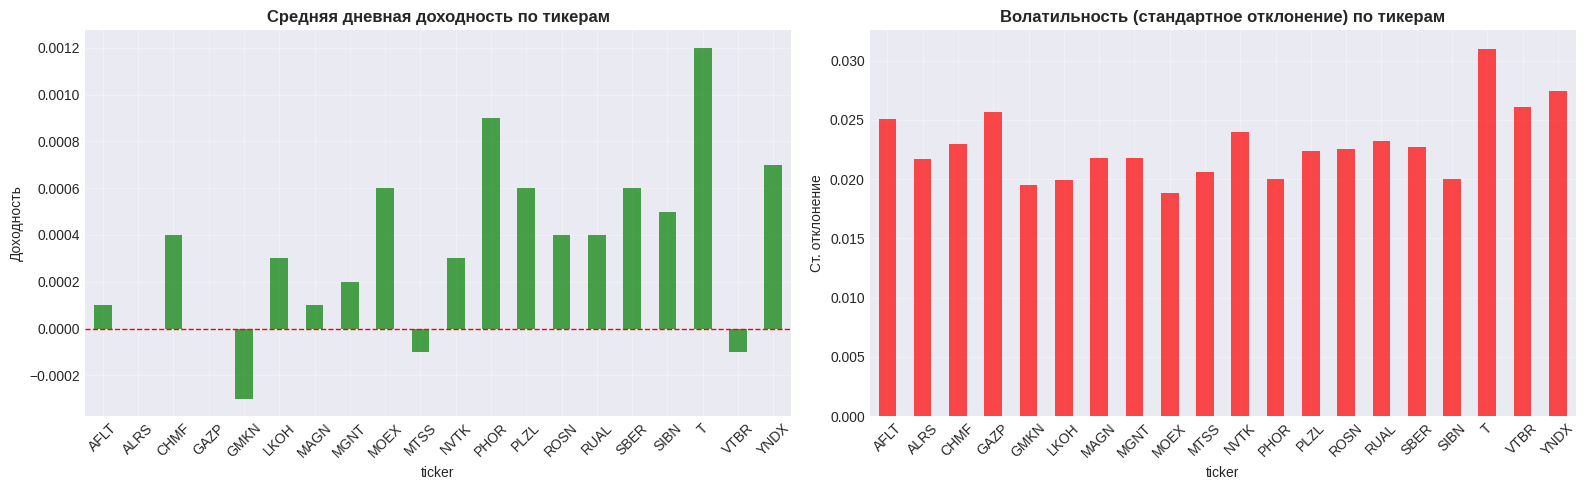

In [10]:
# Статистика доходности по тикерам
returns_stats = df.groupby('ticker')['daily_return'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('median', 'median')
]).round(4)

returns_stats.columns = ['Средняя', 'Ст. откл.', 'Минимум', 'Максимум', 'Медиана']
print("\n=== Статистика дневной доходности по тикерам ===")
print(returns_stats)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

returns_stats['Средняя'].plot(kind='bar', ax=axes[0], color='green', alpha=0.7)
axes[0].set_title('Средняя дневная доходность по тикерам', fontweight='bold')
axes[0].set_ylabel('Доходность')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

returns_stats['Ст. откл.'].plot(kind='bar', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Волатильность (стандартное отклонение) по тикерам', fontweight='bold')
axes[1].set_ylabel('Ст. отклонение')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Анализ объемов торгов


In [11]:
# Статистика по объемам
print("=== Статистика по объемам торгов ===")
print(df['volume'].describe())

volume_stats = df.groupby('ticker')['volume'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(0)

print("\n=== Объемы торгов по тикерам ===")
print(volume_stats)


=== Статистика по объемам торгов ===
count    2.518800e+04
mean     3.248030e+09
std      2.313985e+10
min      1.829000e+03
25%      5.026592e+05
50%      2.576044e+06
75%      1.681908e+07
max      7.032681e+11
Name: volume, dtype: float64

=== Объемы торгов по тикерам ===
                mean        median           std      min           max
ticker                                                                 
AFLT    2.019377e+07  1.396772e+07  1.998406e+07   556540     157878300
ALRS    1.878029e+07  1.605998e+07  1.403014e+07   421880     148679510
CHMF    1.133952e+06  9.512800e+05  8.363430e+05     9585      11742037
GAZP    5.156024e+07  3.789704e+07  4.730235e+07   653380     533021120
GMKN    5.356726e+06  2.318920e+05  1.156458e+07    18909     111298520
LKOH    9.626310e+05  8.134020e+05  6.521430e+05     9744       5901625
MAGN    2.552420e+07  2.105080e+07  1.921133e+07   717160     287895610
MGNT    3.836710e+05  2.995360e+05  3.556110e+05    11119       3738042
MOEX

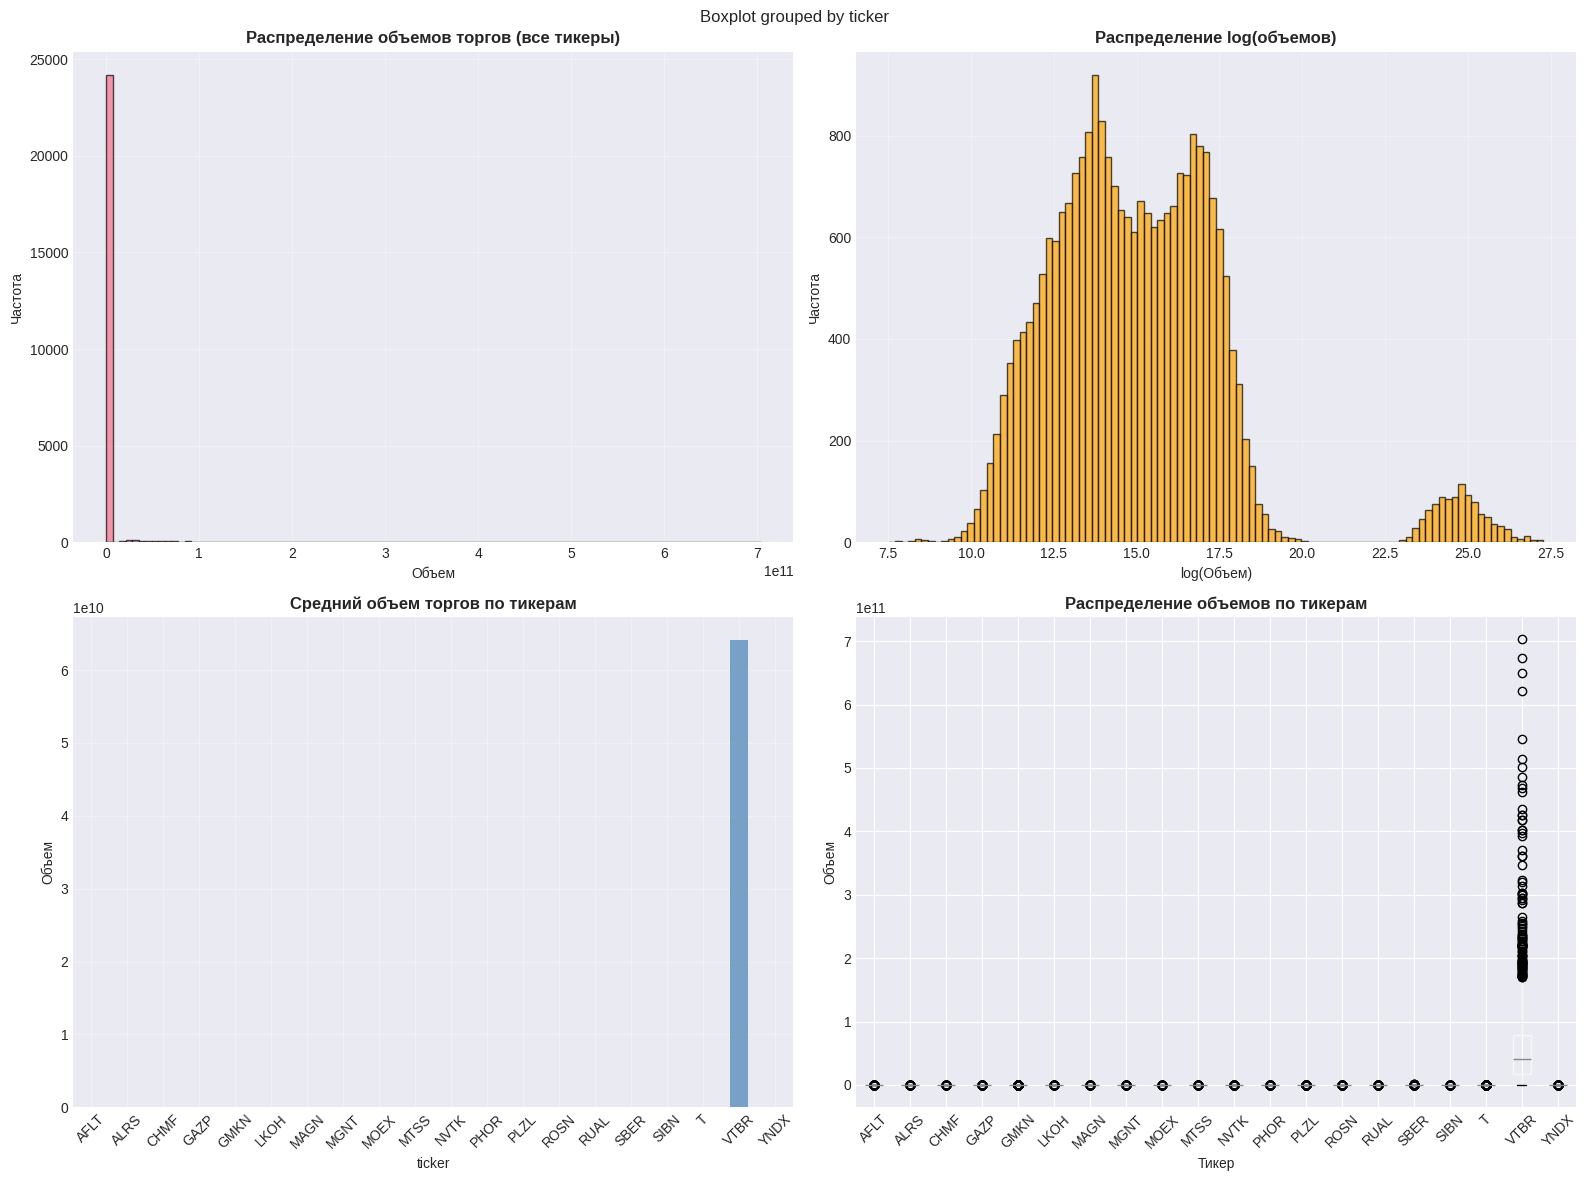

In [12]:
# Визуализация объемов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Распределение объемов
df['volume'].hist(bins=100, ax=axes[0, 0], edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение объемов торгов (все тикеры)', fontweight='bold')
axes[0, 0].set_xlabel('Объем')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True, alpha=0.3)

# Логарифм объемов (для лучшей визуализации)
df['log_volume'] = np.log1p(df['volume'])
df['log_volume'].hist(bins=100, ax=axes[0, 1], edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Распределение log(объемов)', fontweight='bold')
axes[0, 1].set_xlabel('log(Объем)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True, alpha=0.3)

# Средний объем по тикерам
volume_stats['mean'].plot(kind='bar', ax=axes[1, 0], color='steelblue', alpha=0.7)
axes[1, 0].set_title('Средний объем торгов по тикерам', fontweight='bold')
axes[1, 0].set_ylabel('Объем')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Boxplot объемов по тикерам
df.boxplot(column='volume', by='ticker', ax=axes[1, 1])
axes[1, 1].set_title('Распределение объемов по тикерам', fontweight='bold')
axes[1, 1].set_xlabel('Тикер')
axes[1, 1].set_ylabel('Объем')
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 8. Анализ волатильности


In [13]:
# Расчет различных мер волатильности
df['price_range'] = df['high'] - df['low']
df['price_range_pct'] = (df['high'] - df['low']) / df['low'] * 100

# Скользящая волатильность (окно 20 дней)
df['rolling_volatility'] = df.groupby('ticker')['daily_return'].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)

print("=== Статистика волатильности ===")
print(df[['price_range', 'price_range_pct', 'rolling_volatility']].describe())


=== Статистика волатильности ===
        price_range  price_range_pct  rolling_volatility
count  25188.000000     25188.000000        25148.000000
mean      43.619946         3.054483            0.019553
std       85.241515         3.169562            0.012072
min        0.000000         0.000000            0.000452
25%        2.680000         1.650406            0.012747
50%        8.100000         2.425686            0.017080
75%       50.600000         3.599870            0.022707
max     2391.000000       134.314574            0.122430


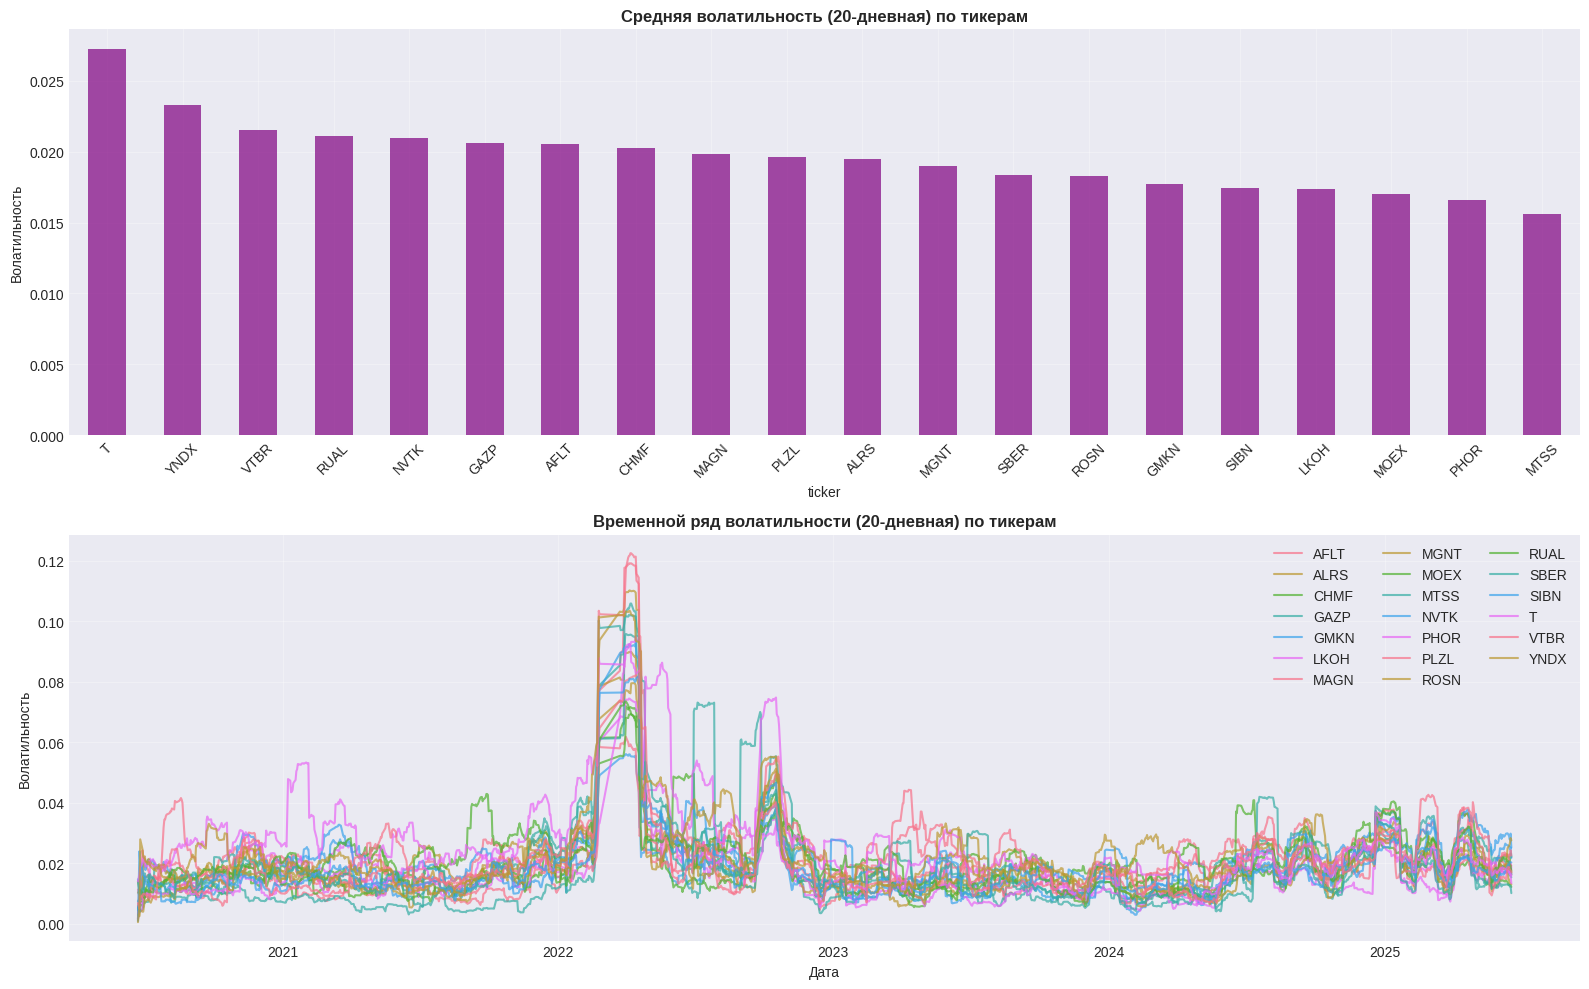

In [14]:
# Визуализация волатильности
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Средняя волатильность по тикерам
volatility_by_ticker = df.groupby('ticker')['rolling_volatility'].mean().sort_values(ascending=False)
volatility_by_ticker.plot(kind='bar', ax=axes[0], color='purple', alpha=0.7)
axes[0].set_title('Средняя волатильность (20-дневная) по тикерам', fontweight='bold')
axes[0].set_ylabel('Волатильность')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Временной ряд волатильности для всех тикеров
for ticker in sorted(tickers):
    ticker_df = df[df['ticker'] == ticker].sort_values('begin')
    axes[1].plot(ticker_df['begin'], ticker_df['rolling_volatility'],
                label=ticker, alpha=0.7, linewidth=1.5)

axes[1].set_title('Временной ряд волатильности (20-дневная) по тикерам', fontweight='bold')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Волатильность')
axes[1].legend(loc='best', ncol=3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 9. Корреляционный анализ


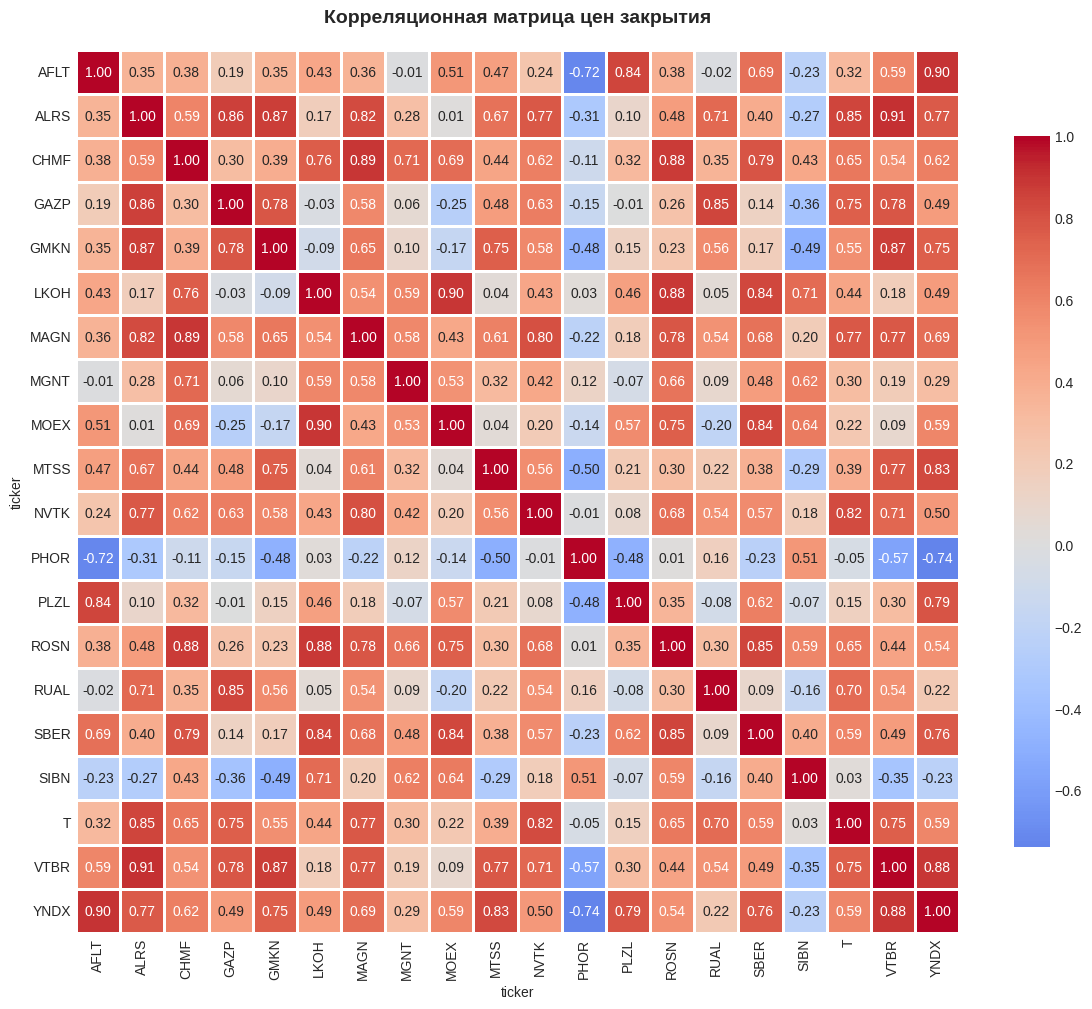


=== Корреляционная матрица ===
ticker      AFLT      ALRS      CHMF      GAZP      GMKN      LKOH      MAGN  \
ticker                                                                         
AFLT    1.000000  0.347852  0.381267  0.191517  0.354890  0.431175  0.364952   
ALRS    0.347852  1.000000  0.592826  0.861108  0.866048  0.170937  0.822471   
CHMF    0.381267  0.592826  1.000000  0.299749  0.389039  0.755623  0.888392   
GAZP    0.191517  0.861108  0.299749  1.000000  0.779705 -0.027418  0.581025   
GMKN    0.354890  0.866048  0.389039  0.779705  1.000000 -0.090582  0.650570   
LKOH    0.431175  0.170937  0.755623 -0.027418 -0.090582  1.000000  0.540774   
MAGN    0.364952  0.822471  0.888392  0.581025  0.650570  0.540774  1.000000   
MGNT   -0.010895  0.281700  0.712517  0.057937  0.097117  0.585881  0.579535   
MOEX    0.508058  0.012806  0.694390 -0.251160 -0.168161  0.895726  0.428658   
MTSS    0.473949  0.669982  0.441235  0.478799  0.750096  0.040538  0.610475   
NVTK    

In [15]:
# Создаем pivot таблицу с ценами закрытия
pivot_close = df.pivot_table(index='begin', columns='ticker', values='close', aggfunc='mean')

# Расчет корреляций
correlation_matrix = pivot_close.corr()

# Визуализация
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Корреляционная матрица цен закрытия', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n=== Корреляционная матрица ===")
print(correlation_matrix)


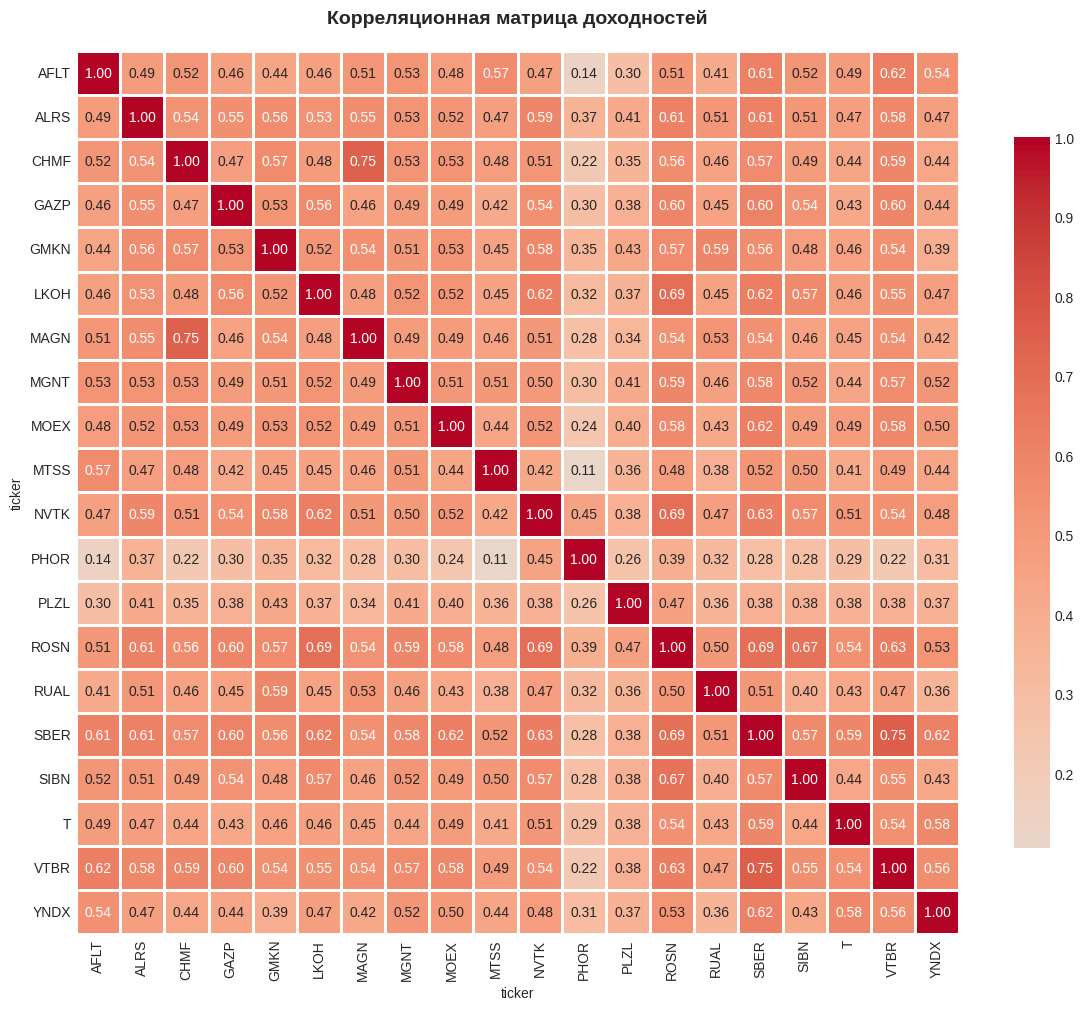


=== Корреляционная матрица доходностей ===
ticker      AFLT      ALRS      CHMF      GAZP      GMKN      LKOH      MAGN  \
ticker                                                                         
AFLT    1.000000  0.492000  0.516218  0.463388  0.443766  0.463223  0.511198   
ALRS    0.492000  1.000000  0.538179  0.552265  0.556381  0.534531  0.553562   
CHMF    0.516218  0.538179  1.000000  0.474562  0.569057  0.483732  0.747478   
GAZP    0.463388  0.552265  0.474562  1.000000  0.528587  0.564159  0.462280   
GMKN    0.443766  0.556381  0.569057  0.528587  1.000000  0.521038  0.544972   
LKOH    0.463223  0.534531  0.483732  0.564159  0.521038  1.000000  0.475865   
MAGN    0.511198  0.553562  0.747478  0.462280  0.544972  0.475865  1.000000   
MGNT    0.529795  0.525230  0.527242  0.491384  0.505723  0.523173  0.488037   
MOEX    0.483197  0.515094  0.530473  0.488587  0.526694  0.522321  0.489663   
MTSS    0.566359  0.473965  0.482015  0.418268  0.448638  0.446129  0.462265

In [16]:
# Корреляция доходностей
pivot_returns = df.pivot_table(index='begin', columns='ticker', values='daily_return', aggfunc='mean')
returns_correlation = pivot_returns.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(returns_correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Корреляционная матрица доходностей', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n=== Корреляционная матрица доходностей ===")
print(returns_correlation)


## 10. Итоговая сводка


In [17]:
print("="*80)
print("ИТОГОВАЯ СВОДКА ПО ДАННЫМ")
print("="*80)

print(f"\n📊 Общая информация:")
print(f"  - Всего записей: {len(df):,}")
print(f"  - Количество тикеров: {len(tickers)}")
print(f"  - Период данных: {df['begin'].min().date()} - {df['begin'].max().date()}")
print(f"  - Длительность: {(df['begin'].max() - df['begin'].min()).days} дней")

print(f"\n📈 Тикеры:")
print(f"  {', '.join(sorted(tickers))}")

print(f"\n💰 Ценовая статистика:")
print(f"  - Минимальная цена: {df['low'].min():.2f}")
print(f"  - Максимальная цена: {df['high'].max():.2f}")
print(f"  - Средняя цена закрытия: {df['close'].mean():.2f}")

print(f"\n📊 Доходность:")
print(f"  - Средняя дневная доходность: {df['daily_return'].mean()*100:.4f}%")
print(f"  - Стандартное отклонение: {df['daily_return'].std()*100:.4f}%")
print(f"  - Минимальная доходность: {df['daily_return'].min()*100:.2f}%")
print(f"  - Максимальная доходность: {df['daily_return'].max()*100:.2f}%")

print(f"\n📦 Объемы торгов:")
print(f"  - Средний объем: {df['volume'].mean():,.0f}")
print(f"  - Медианный объем: {df['volume'].median():,.0f}")
print(f"  - Максимальный объем: {df['volume'].max():,.0f}")

print(f"\n⚡ Волатильность:")
for ticker in sorted(tickers):
    ticker_vol = df[df['ticker'] == ticker]['rolling_volatility'].mean()
    print(f"  - {ticker}: {ticker_vol*100:.4f}%")

print(f"\n✅ Качество данных:")
print(f"  - Пропущенные значения: {df.isnull().sum().sum()}")
print(f"  - Дубликаты: {df.duplicated().sum()}")

print("\n" + "="*80)


ИТОГОВАЯ СВОДКА ПО ДАННЫМ

📊 Общая информация:
  - Всего записей: 25,188
  - Количество тикеров: 20
  - Период данных: 2020-06-19 - 2025-06-18
  - Длительность: 1825 дней

📈 Тикеры:
  AFLT, ALRS, CHMF, GAZP, GMKN, LKOH, MAGN, MGNT, MOEX, MTSS, NVTK, PHOR, PLZL, ROSN, RUAL, SBER, SIBN, T, VTBR, YNDX

💰 Ценовая статистика:
  - Минимальная цена: 21.44
  - Максимальная цена: 10097.00
  - Средняя цена закрытия: 1484.02

📊 Доходность:
  - Средняя дневная доходность: 0.0333%
  - Стандартное отклонение: 2.2988%
  - Минимальная доходность: -41.25%
  - Максимальная доходность: 33.37%

📦 Объемы торгов:
  - Средний объем: 3,248,030,486
  - Медианный объем: 2,576,044
  - Максимальный объем: 703,268,100,000

⚡ Волатильность:
  - AFLT: 2.0542%
  - ALRS: 1.9479%
  - CHMF: 2.0251%
  - GAZP: 2.0584%
  - GMKN: 1.7757%
  - LKOH: 1.7386%
  - MAGN: 1.9851%
  - MGNT: 1.9019%
  - MOEX: 1.6988%
  - MTSS: 1.5588%
  - NVTK: 2.0996%
  - PHOR: 1.6605%
  - PLZL: 1.9659%
  - ROSN: 1.8293%
  - RUAL: 2.1090%
  - SBER: